In [1]:
import pandas as pd
import numpy as np
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
path = "C:/Users/Darck/Modern_Phy_Lab/6 Doble Rendija/Double Slit.csv"

data = pd.read_csv(path, sep = ";")
data

,Longitud,Voltaje,Unnamed: 2
0,-4700,0.020,NaN
1,-4680,0.021,NaN
2,-4660,0.021,NaN
3,-4640,0.022,NaN
4,-4620,0.022,NaN
...,...,...,...
397,3240,0.303,NaN
398,3260,0.309,NaN
399,3280,0.315,NaN
400,3300,0.321,NaN


In [3]:
end = 402 - 60 
lenght = data["Longitud"].to_numpy()*1e-3 # Está en mm.
lenght[235] = 0.000001
lenght = lenght[130:402-78]
voltage = data["Voltaje"].to_numpy()
voltage = voltage[130:402-78]
voltage = voltage - 0.059
len(voltage), len(lenght)

(194, 194)

In [41]:
def GetPropagation(expr,vars,sigmas,measures):
    prop = 0
    for i in range(len(measures)):
        prop += expr.diff(var[i])**2 * sigmas[i]**2
    
    sigma = sym.sqrt(prop)
    #Sección para soltar el valor calculado y la incertidumbre del valor calculado. 

    sigma = sym.lambdify(var,sigma)
    mean = sym.lambdify(var,exp)
    return mean(*measures),sigma(*measures)

def New_Inc(inc1, inc2):
    return np.sqrt(inc1**2 + inc2**2)

lenght_inc = 10*1e-3
voltage_inc = 0.001
lenght_inc

0.01

In [26]:
# Para poder medir hacer predicciones se ocupa generar una relación V [mV] vs θ:

vars = "y"
var = sym.symbols(vars, real = True)
var = np.array([var])
sig = np.array([lenght_inc])
exp = sym.atan(var[0]/470)
inc = np.array([])

data = GetPropagation(exp,var,sig,np.array([lenght]))

theta = np.arctan(lenght/470)
theta_inc = np.sum(data[1])/len(data[1])

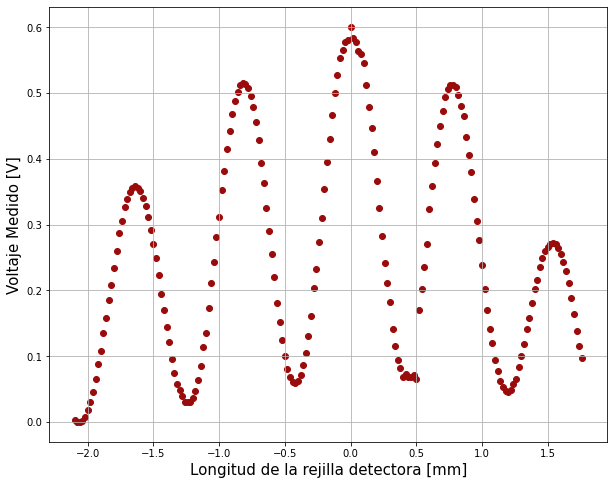

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(lenght, voltage,  color = "#9A0B0B")
plt.xlabel(r"Longitud de la rejilla detectora [mm]", fontsize = 15)
plt.ylabel(r"Voltaje Medido [V]", fontsize = 15)
plt.grid()
plt.savefig("Distancia.pdf")

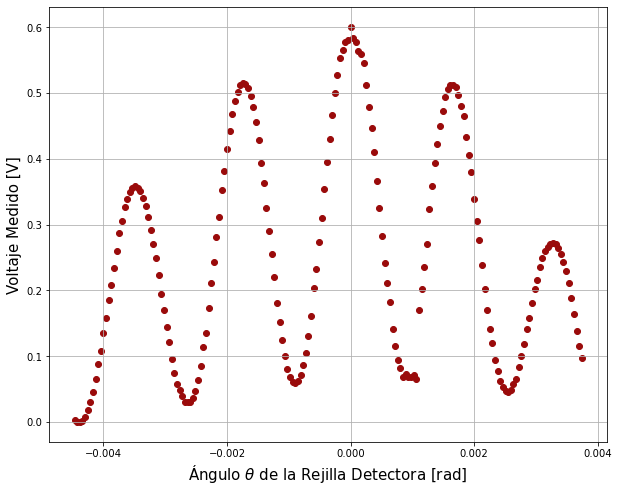

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(theta, voltage,  color = "#9A0B0B")
plt.xlabel(r"Ángulo $\theta$ de la Rejilla Detectora [rad]", fontsize = 15)
plt.ylabel(r"Voltaje Medido [V]", fontsize = 15)
plt.grid()
plt.savefig("VoltajeÁngulo.pdf")

In [29]:
a = 0.1
d = 0.457
lambda_ = 0.00067
l = 470

def Double_Slit(theta, I_0):
    alpha = (np.pi*a)/lambda_ * np.sin(theta)
    beta = (np.pi*d)/lambda_ * np.sin(theta)
    return (I_0) * (np.cos(beta))**2 * ((np.sin(alpha)/alpha)**2)

def Single_Slit(theta, I_0):
    alpha = (np.pi*a)/lambda_ * np.sin(theta)
    return I_0 *((np.sin(alpha)/alpha)**2)

(array([0.56984599]), array([0.02637907]))

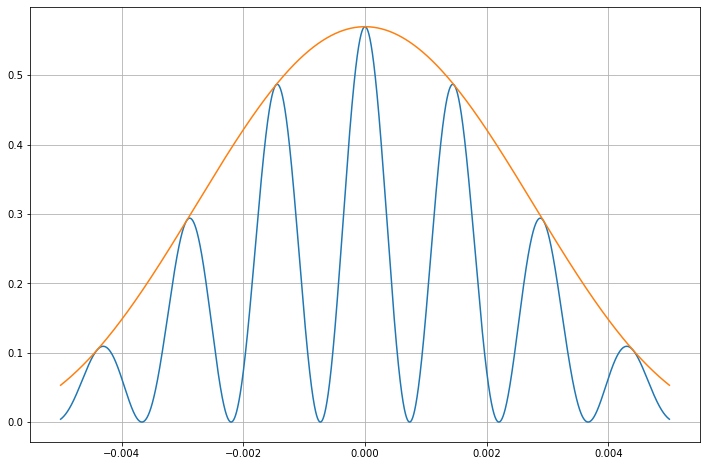

In [30]:
theta_ = np.linspace(-0.005, 0.005, int(1e5))
popt, pcov = optimize.curve_fit(Double_Slit, theta, voltage)
ymodel = Double_Slit(theta_, *popt)
ymodel1 = Single_Slit(theta_, *popt)

plt.figure(figsize=(12,8))
plt.plot(theta_, ymodel)
plt.plot(theta_, ymodel1)
plt.grid()

popt, np.sqrt(np.diag(pcov))

In [31]:
popt, pcov = optimize.curve_fit(Double_Slit, lenght, voltage)
popt, pcov

(array([0.60138941]), array([[0.09012722]]))

In [32]:
new = Double_Slit(lenght, *popt)

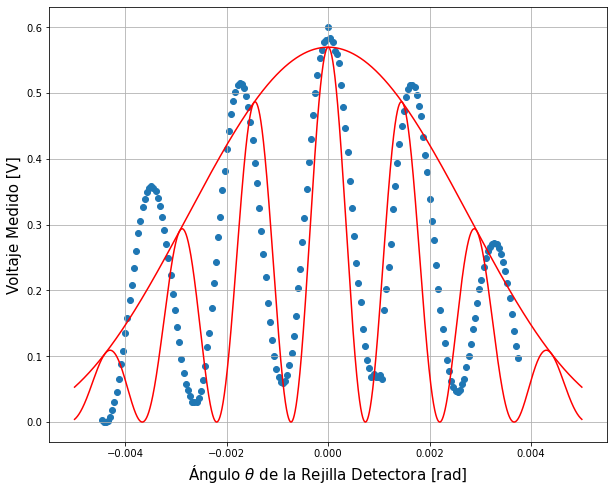

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(theta, voltage)
plt.plot(theta_, ymodel, color = "r")
plt.plot(theta_, ymodel1, color = "r")
plt.xlabel(r"Ángulo $\theta$ de la Rejilla Detectora [rad]", fontsize = 15)
plt.ylabel(r"Voltaje Medido [V]", fontsize = 15)
plt.grid()
plt.savefig("Interferencia.pdf")

In [34]:
vars = "x"
var = sym.symbols(vars, real = True)
var = np.array([var])
sig = np.array([theta_inc])

exp = d*sym.sin(var[0])
               
maxima = np.array([0.00145, 0.00287, 0.00435])

data1 = GetPropagation(exp,var,sig,np.array([maxima[0]]))
data1

(0.0006626497677964203, 9.723337542557353e-06)

In [35]:
vars = "y"
var = sym.symbols(vars, real = True)
var = np.array([var])
sig = np.array([theta_inc])

exp = d*sym.sin(var[0])/2

maxima = np.array([0.00145, 0.00287, 0.00435])

data2 = GetPropagation(exp,var,sig,np.array([maxima[1]]))
data2

(0.0006557940997140649, 4.861653859565394e-06)

In [36]:
vars = "y"
var = sym.symbols(vars, real = True)
var = np.array([var])
sig = np.array([theta_inc])

exp = d*sym.sin(var[0])/3

data3 = GetPropagation(exp,var,sig,np.array([maxima[2]]))
data3

(0.0006626479101695382, 3.2410852564486434e-06)

In [37]:
value1 = d*np.sin(0.00145)/1
value2 = d*np.sin(0.00287)/2
value3 = d*np.sin(0.00435)/3
value1, value2, value3

(0.0006626497677964203, 0.0006557940997140649, 0.0006626479101695397)

In [38]:
data4 = [(data1[0] + data2[0])/2, New_Inc(data1[1], data2[1])]

In [40]:
a, b = (data4[0] + data3[0])/2, New_Inc(data4[1], data3[1])
a, b

(0.0006609349219623904, 1.1343879621024773e-05)

0.0006495910423413656